## This notebook compares the H-alpha velocity model of the disk with a CO velocity model (taken from Krieger et al. 2019).

Krieger et al. (2019) looked at NGC 253 using CO(1-0) data. The authors created a velocity model of the entire NGC 253 disk. We can localize this model on the same northwest region of our MUSE data cube. More technically, we will reproject the Krieger et al. (2019) cube in the same footprint as our MUSE cube. Then we can compare them!

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube
from astropy.io import fits
from astropy.wcs import wcs
from reproject import reproject_interp

In [73]:
# read in the data cubes
north_cube = fits.open('../../ngc253/data/ADP.2019-08-24T09_53_08.548.fits')
CO_cube = fits.open('../../ngc253/data/NGC253.CO_1-0.diskfit.total_model_NKrieger.fits')

# we want the CO cube to just have 2 axes (RA and Dec)
w = wcs.WCS(CO_cube[0].header, naxis=2).celestial
CO_cube_new = fits.PrimaryHDU(data=CO_cube[0].data, header=w.to_header())

# we also want our cube to just have 2 axes (RA and Dec)
w = wcs.WCS(north_cube[1].header, naxis=2).celestial
north_cube_header = w.to_header()
z, y, x = north_cube[1].shape

# now open the CO cube and reproject it into the footprint
# of our cube using the wcs information
CO_cube_array, footprint = reproject_interp(CO_cube_new, north_cube_header, shape_out=(y,x))

# convert from LSRK to Barycentric frame to match our data
# https://docs.astropy.org/en/stable/api/astropy.coordinates.LSRK.html
CO_cube_array = CO_cube_array - 20  # km/s

# subtract the systemic velocity
CO_cube_array = CO_cube_array - 243  # km/s

Now we want to plot our H-alpha model and the CO model for comparison.

In [74]:
# set up the plot
plt.rcParams['text.usetex'] = False
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.5
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams["font.family"] = "courier new"
plt.rcParams["font.style"] = "normal"
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.weight"] = 'bold'

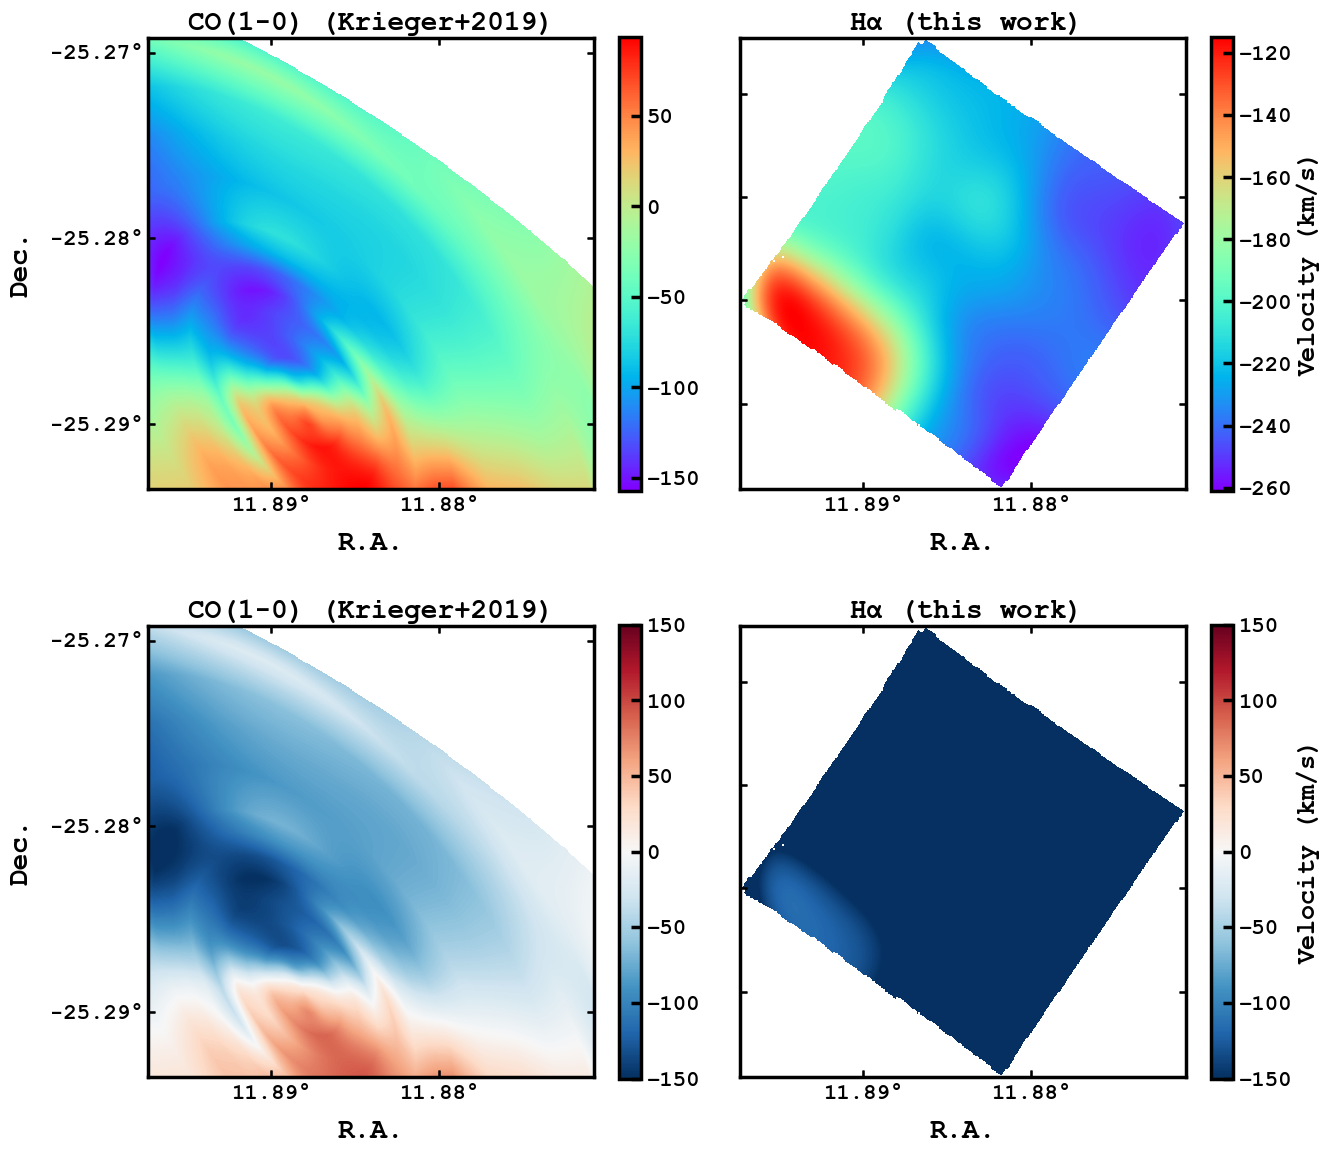

In [87]:
plt.figure(figsize=(14,14))

# ============================================
# Plot to see range of values for each model
# ============================================


# plot the CO velocity model
ax = plt.subplot(2, 2, 1, projection=w)
im = ax.imshow(CO_cube_array, origin='lower', cmap='rainbow')
ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5)
ax.set_xlabel('R.A.', fontsize=20)
ax.set_ylabel('Dec.', fontsize=20)
ax.coords[0].set_major_formatter('d.dd')
ax.coords[1].set_major_formatter('d.dd')
ax.set_title('CO(1-0) (Krieger+2019)',fontsize=20)

# add a color bar
bar = plt.colorbar(im, fraction=0.046)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')

# read in our H-alpha velocity model
Halpha_cube = fits.open('../disk_smoothvel_ngc253_allcube.fits')
Halpha_cube_array = Halpha_cube[0].data - 243.  # subtract the systemic velocity

# plot the model
ax = plt.subplot(2, 2, 2, projection=w)
im = ax.imshow(Halpha_cube_array, origin='lower', cmap='rainbow')
ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5)

# turn off some axes labels
ax.coords[1].set_auto_axislabel(False)
ax.coords[1].set_ticklabel_visible(False)
ax.coords[0].set_major_formatter('d.dd')
ax.set_xlabel('R.A.', fontsize=20)

# set a title
ax.set_title('H$\\alpha$ (this work)',fontsize=20)

# add a color bar
bar = plt.colorbar(im, fraction=0.046)
bar.set_label('Velocity (km/s)', fontsize=18)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')


# ============================================
# Now match the range of values for both
# ============================================

# plot the CO velocity model
ax = plt.subplot(2, 2, 3, projection=w)
im = ax.imshow(CO_cube_array, origin='lower', vmin=-150, vmax=150, cmap='RdBu_r')
ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5)
ax.set_xlabel('R.A.', fontsize=20)
ax.set_ylabel('Dec.', fontsize=20)
ax.coords[0].set_major_formatter('d.dd')
ax.coords[1].set_major_formatter('d.dd')
ax.set_title('CO(1-0) (Krieger+2019)',fontsize=20)

# add a color bar
bar = plt.colorbar(im, fraction=0.046)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')

# read in our H-alpha velocity model
Halpha_cube = fits.open('../disk_smoothvel_ngc253_allcube.fits')
Halpha_cube_array = Halpha_cube[0].data - 243.  # subtract the systemic velocity

# plot the model
ax = plt.subplot(2, 2, 4, projection=w)
im = ax.imshow(Halpha_cube_array, origin='lower', vmin=-150, vmax=150, cmap='RdBu_r')
ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5)

# turn off some axes labels
ax.coords[1].set_auto_axislabel(False)
ax.coords[1].set_ticklabel_visible(False)
ax.coords[0].set_major_formatter('d.dd')
ax.set_xlabel('R.A.', fontsize=20)

# set a title
ax.set_title('H$\\alpha$ (this work)',fontsize=20)

# add a color bar
bar = plt.colorbar(im, fraction=0.046)
bar.set_label('Velocity (km/s)', fontsize=18)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')

plt.savefig('north_cube_velocity_model_comparison.png', dpi=200)
plt.show()